In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

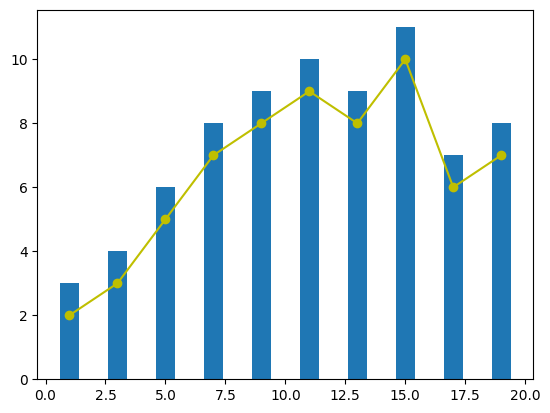

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
y_bar = [3, 4, 6, 8, 9, 10, 9, 11, 7, 8]
y_line = [2, 3, 5, 7, 8, 9, 8, 10, 6, 7]

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

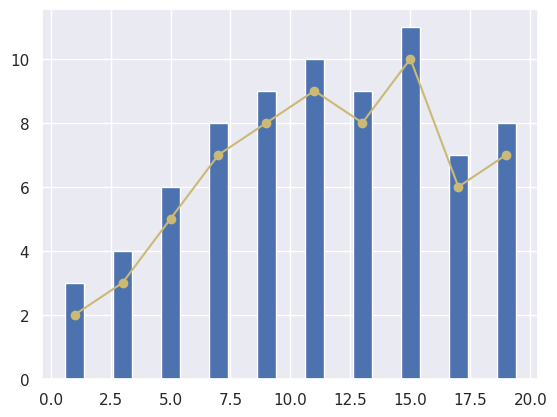

In [3]:
import seaborn as sns

sns.set()  # 声明使用 Seaborn 样式

plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')

In [4]:
sns.set(context='notebook', # 参数控制着默认的画幅大小，分别有 {paper, notebook, talk, poster} 四个值。其中，poster > talk > notebook > paper。
        style='darkgrid',   # 参数控制默认样式，分别有 {darkgrid, whitegrid, dark, white, ticks}
        palette='deep',     # 参数为预设的调色板。分别有 {deep, muted, bright, pastel, dark, colorblind} 等
        font='sans-serif',  # 用于设置字体
        font_scale=1,       # 用于设置字体大小，整数字号或者浮点数
        color_codes=False,  # 用于设置是否使用颜色代码
        rc=None)            # 用于设置 matplotlib 的参数

In [14]:
3*3/4*3/4

1.6875

/home/user/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


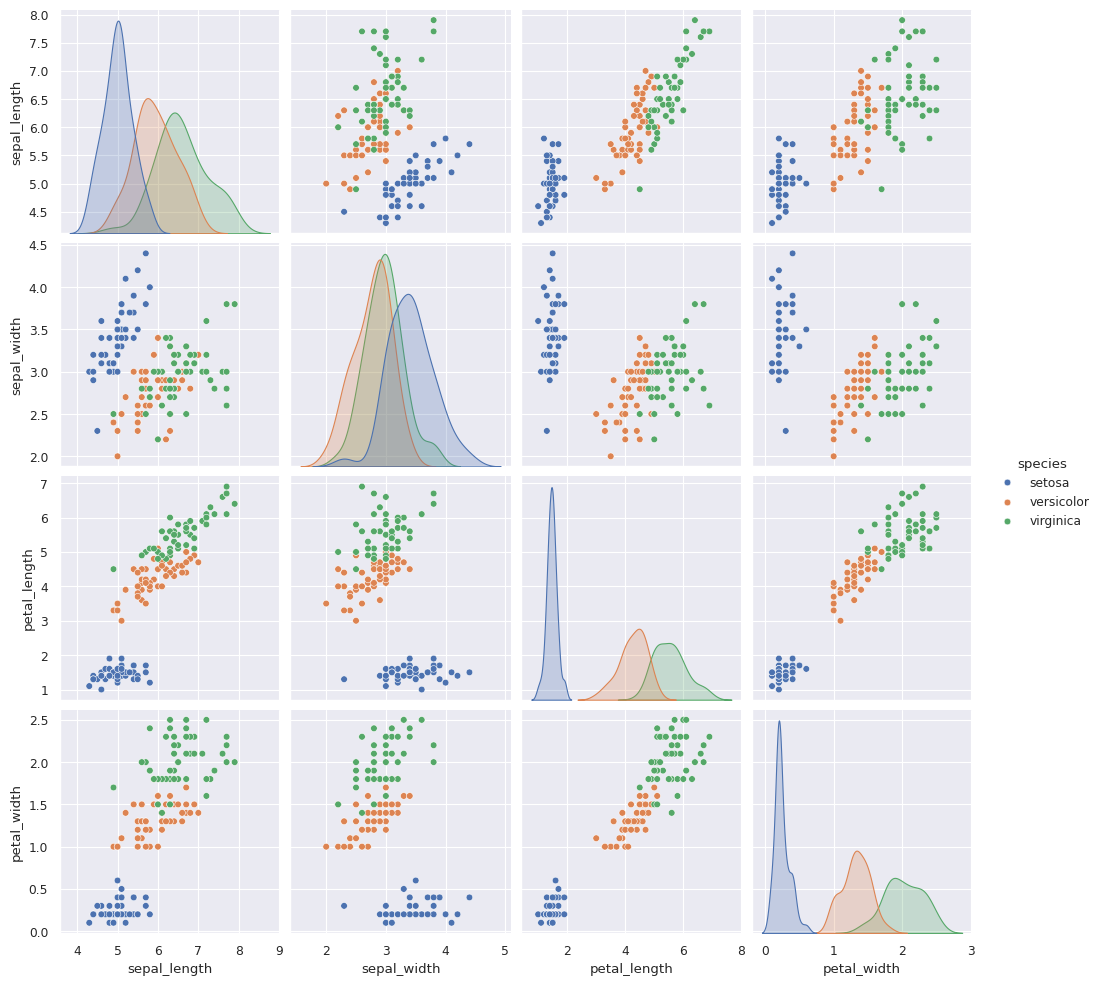

In [7]:
sns.set(context='paper', # 参数控制着默认的画幅大小，分别有 {paper, notebook, talk, poster} 四个值。其中，poster > talk > notebook > paper。
        style='darkgrid',   # 参数控制默认样式，分别有 {darkgrid, whitegrid, dark, white, ticks}
        palette='deep',     # 参数为预设的调色板。分别有 {deep, muted, bright, pastel, dark, colorblind} 等
        font='sans-serif',  # 用于设置字体
        font_scale=1,       # 用于设置字体大小，整数字号或者浮点数
        color_codes=False,  # 用于设置是否使用颜色代码
        rc=None)            # 用于设置 matplotlib 的参数

sns.pairplot(iris, hue="species")

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data # 特征
iris.target # 标签

In [ ]:
url = 'https://www.gairuo.com/file/data/dataset/iris.data'
iris = pd.read_csv(url, header=1,
                 names=['萼片长度', '萼片宽度', '花瓣长度', '花瓣宽度', '品种'])
iris.head()
iris.iloc[:, :2] # .values # 取出第一列和第二列

In [3]:
url = 'https://www.gairuo.com/file/data/dataset/iris.data'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


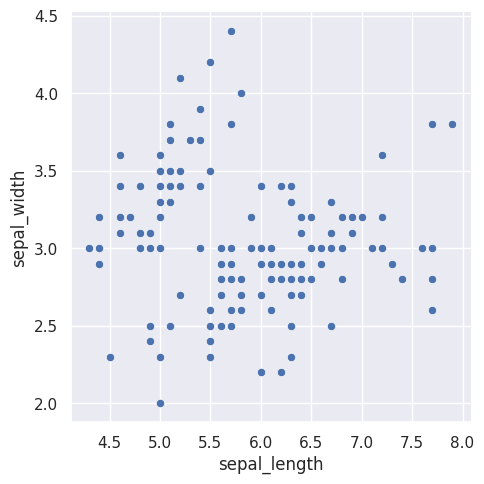

In [8]:
sns.set()
sns.relplot(x="sepal_length", y="sepal_width", data=iris)

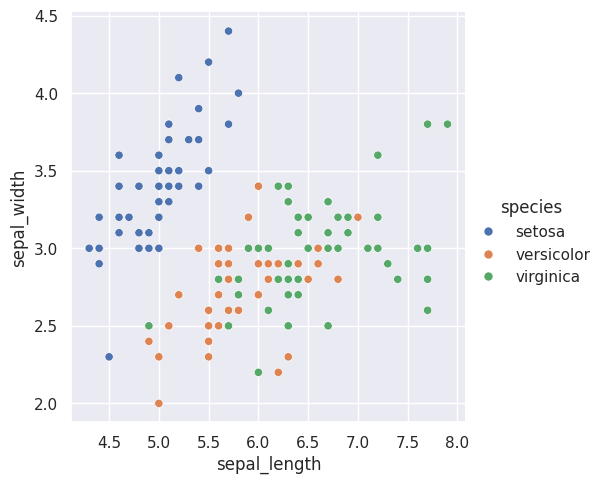

In [9]:
sns.relplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

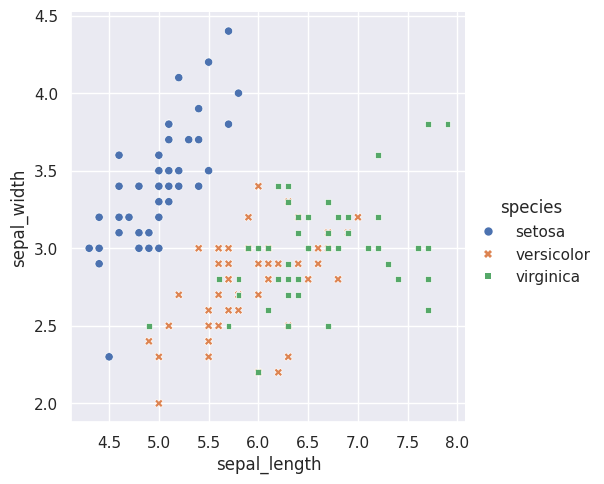

In [10]:
sns.relplot(x="sepal_length", y="sepal_width",
            hue="species", style="species", data=iris)

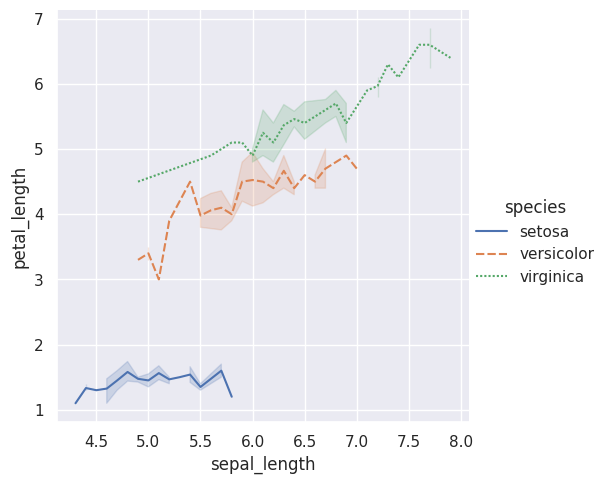

In [11]:
sns.relplot(x="sepal_length", y="petal_length",
            hue="species", style="species", kind="line", data=iris)

<Axes: xlabel='sepal_length', ylabel='petal_length'>

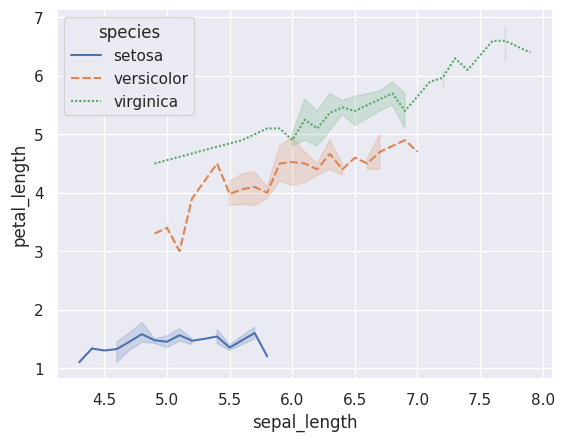

In [12]:
sns.lineplot(x="sepal_length", y="petal_length",
             hue="species", style="species", data=iris)

你会发现，上面我们一个提到了 3 个 API，分别是：relplot，scatterplot 和 lineplot。实际上，你可以把我们已经练习过的 relplot 看作是 scatterplot 和 lineplot 的结合版本。


这里就要提到 Seaborn 中的 API 层级概念，Seaborn 中的 API 分为 Figure-level 和 Axes-level 两种。relplot 就是一个 Figure-level 接口，而 scatterplot 和 lineplot 则是 Axes-level 接口。

Figure-level 和 Axes-level API 的区别在于，Axes-level 的函数可以实现与 Matplotlib 更灵活和紧密的结合，而 Figure-level 则更像是「懒人函数」，适合于快速应用。


例如上方的图，我们也可以使用 lineplot 函数绘制，你只需要取消掉 relplot 中的 kind 参数即可。

## 类别图

与关联图相似，类别图的 Figure-level 接口是 catplot，其为 categorical plots 的缩写。而 catplot 实际上是如下 Axes-level 绘图 API 的集合：

- 分类散点图：
    - stripplot() (kind="strip")
    - swarmplot() (kind="swarm")
- 分类分布图：
    - boxplot() (kind="box")
    - violinplot() (kind="violin")
    - boxenplot() (kind="boxen")
- 分类估计图：
    - pointplot() (kind="point")
    - barplot() (kind="bar")
    - countplot() (kind="count")

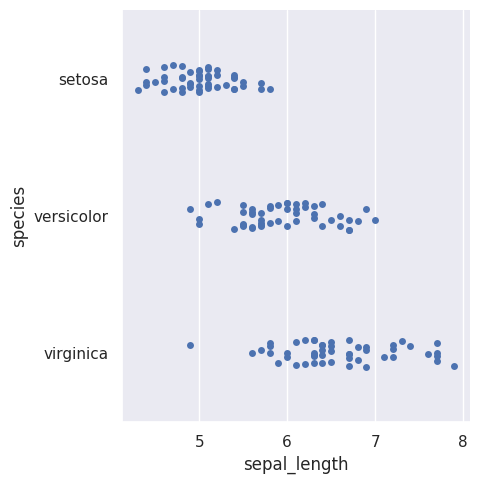

In [18]:
sns.catplot(x="sepal_length", y="species", data=iris)

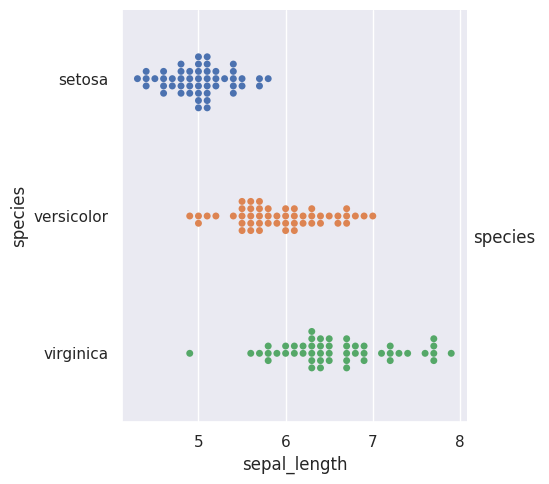

In [25]:
sns.catplot(x="sepal_length", 
            y="species", 
            hue="species",
            kind="swarm",       # kind="swarm" 可以让散点按照 beeswarm 的方式防止重叠，可以更好地观测数据分布。
            data=iris)

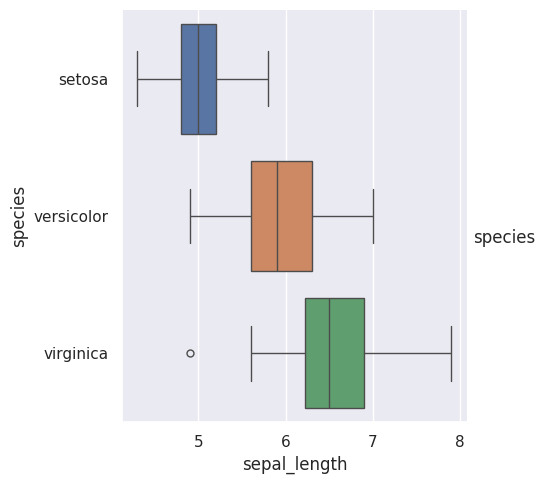

In [29]:
# 箱线图: 用于展示数据的分布情况，包括最大值、最小值、中位数、上下四分位数等。
# 异常值的识别: 常值通常以单独的点显示出来
# 识别数据的偏斜: 箱线图可以帮助您识别数据的偏斜程度。如果箱线图显示一个箱子较长的一侧比另一侧长，这表明数据在那一侧偏斜较多。

sns.catplot(x="sepal_length", y="species", hue="species", kind="box", data=iris)

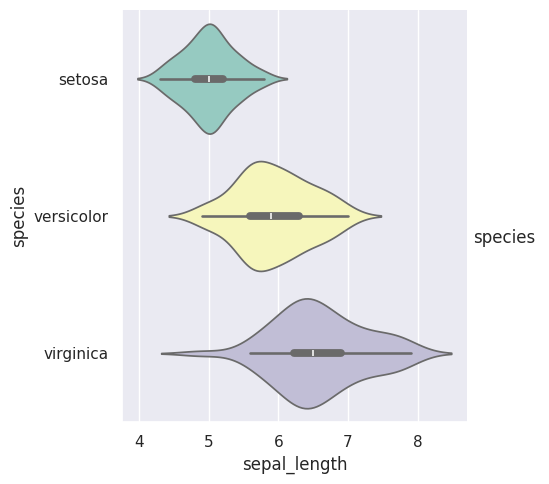

In [30]:
# 小提琴图
# 识别数据的多模态性：小提琴图能够显示数据的多模态性，即数据分布中存在多个峰值。这对于识别数据中的子群或不同的分布模式非常有用。
# 数据分布的偏斜：通过观察小提琴图的形状，您可以估计数据的偏斜程度。如果小提琴图的一侧比另一侧长，那么数据可能存在偏斜。
# 对称性的检测：小提琴图也可以用于检测数据的对称性。对称分布的小提琴图通常在中位数处对称，而非对称分布则表现为不对称的形状。
# 数据的密度估计：小提琴图中的宽度表示数据点在不同位置的密度，可以帮助您了解数据的分布密度。
sns.catplot(x="sepal_length", y="species", hue="species", kind="violin", data=iris, palette="Set3")

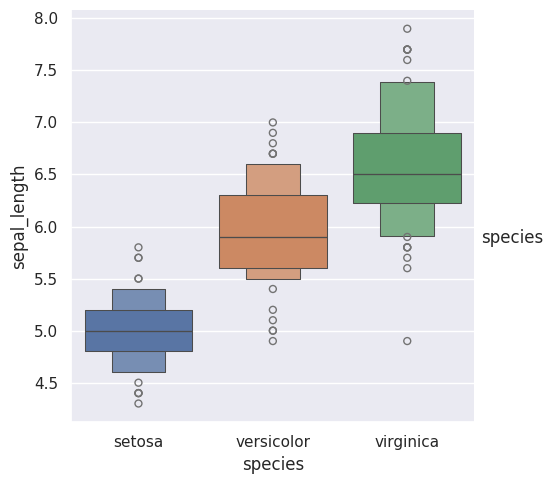

In [32]:
# 增强箱线图
sns.catplot(x="species", y="sepal_length", hue="species", kind="boxen", data=iris)

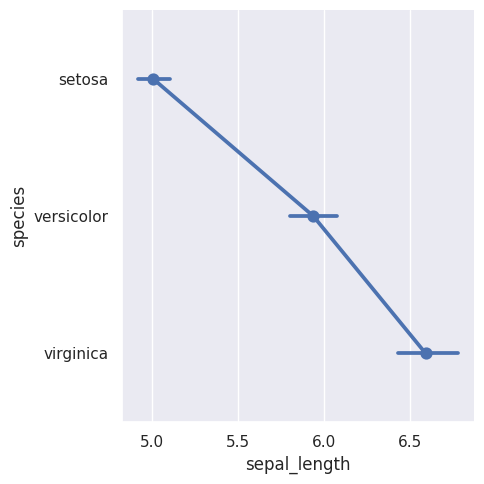

In [35]:
# 点线图
sns.catplot(x="sepal_length", y="species", kind="point", data=iris)

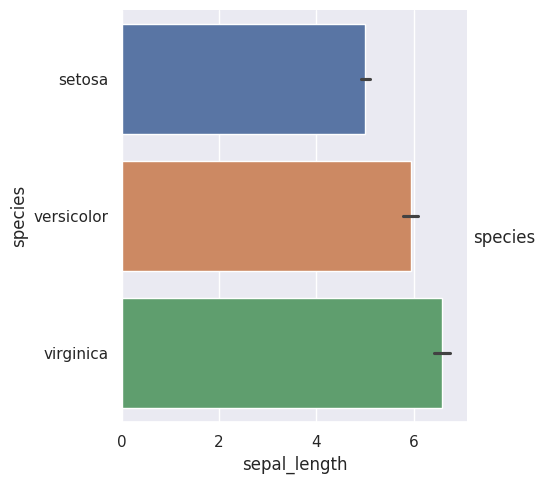

In [36]:
# 条形图
sns.catplot(x="sepal_length", y="species", hue="species", kind="bar", data=iris)

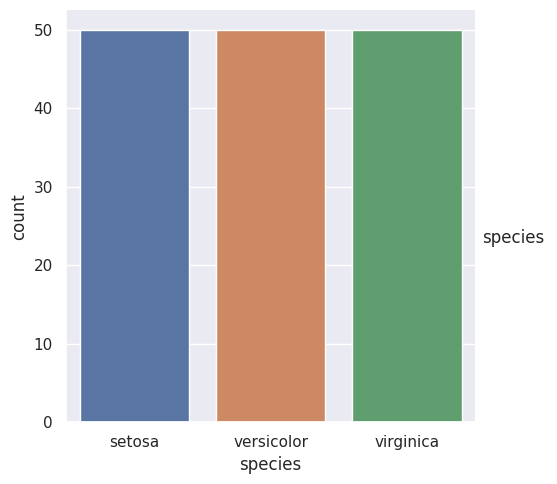

In [38]:
# 计数条形图
sns.catplot(x="species", hue="species", kind="count", data=iris)

## 分布图

分布图主要是用于可视化变量的分布情况，一般分为单变量分布和多变量分布。当然这里的多变量多指二元变量，更多的变量无法绘制出直观的可视化图形。

Seaborn 提供的分布图绘制方法一般有这几个：

jointplot，pairplot，distplot，kdeplot。接下来，我们依次来看一下这些绘图方法的使用。

Seaborn 快速查看单变量分布的方法是 distplot。默认情况下，该方法将会绘制直方图并拟合核密度估计图。

/tmp/ipykernel_661560/2986169507.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris["sepal_length"])


<Axes: xlabel='sepal_length', ylabel='Density'>

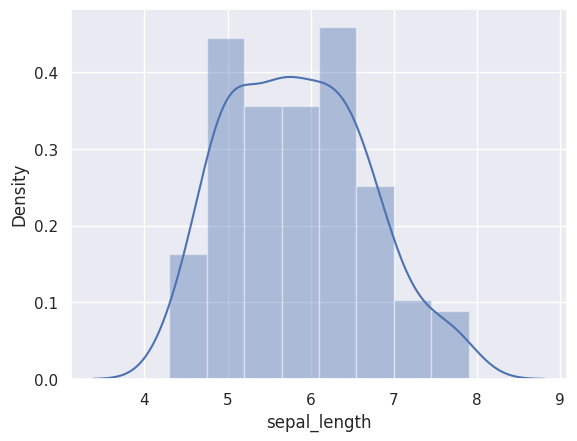

In [44]:
sns.distplot(iris["sepal_length"])
# sns.histplot(iris["sepal_length"])

<Axes: xlabel='sepal_length', ylabel='Density'>

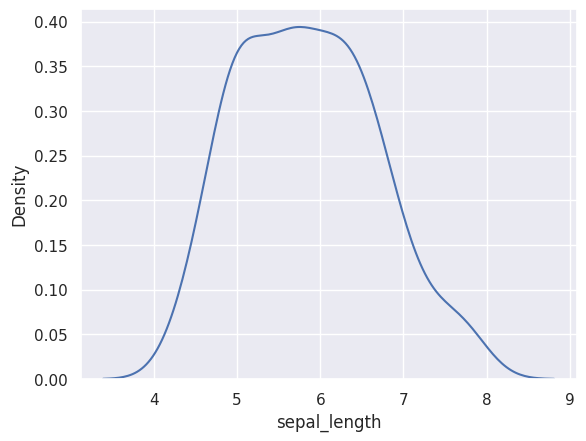

In [45]:
sns.kdeplot(iris["sepal_length"])

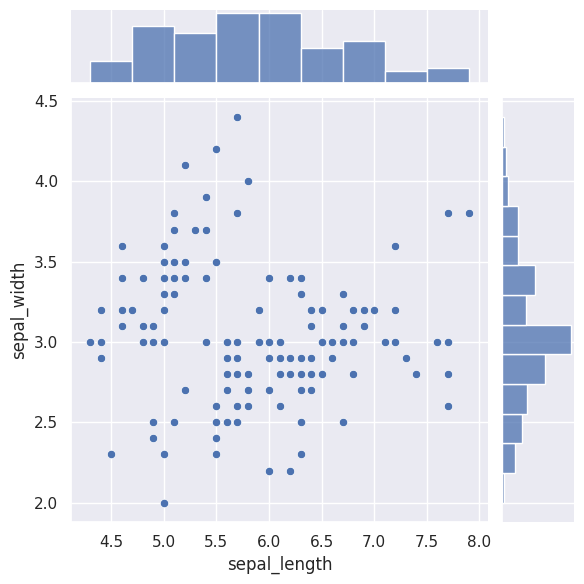

In [48]:
# 二元变量分布图
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

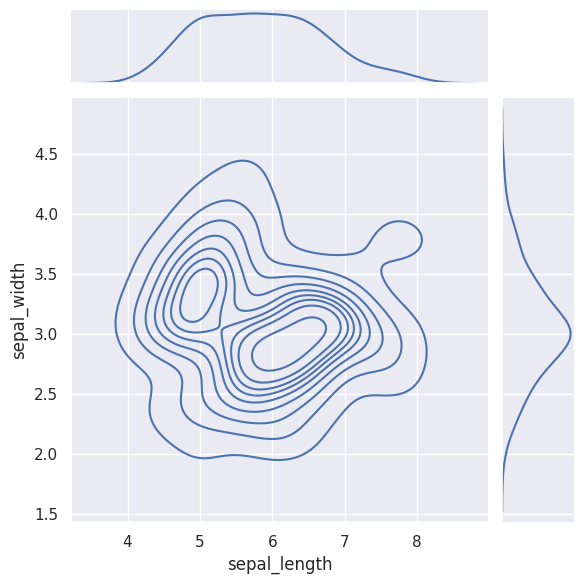

In [50]:
# 核密度估计对比图
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")

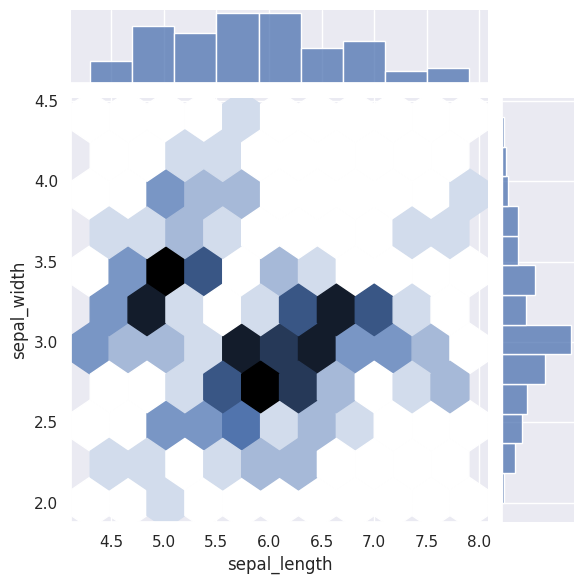

In [51]:
# 六边形计数图
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="hex")

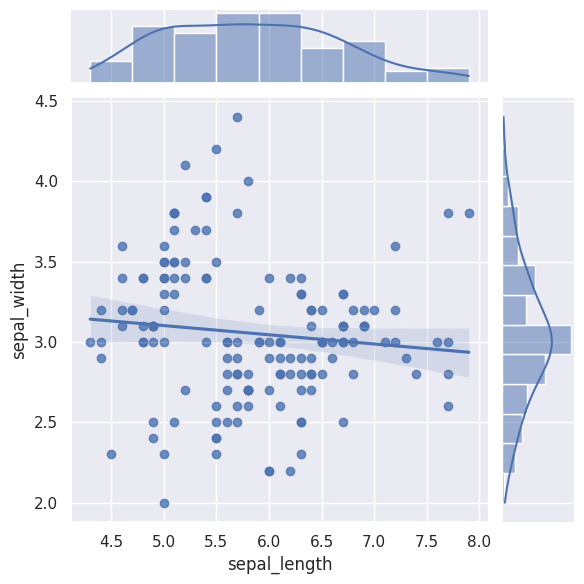

In [52]:
# 回归拟合图
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="reg")

pairplot 支持一次性将数据集中的特征变量两两对比绘图。默认情况下，对角线上是单变量分布图，而其他则是二元变量分布图。

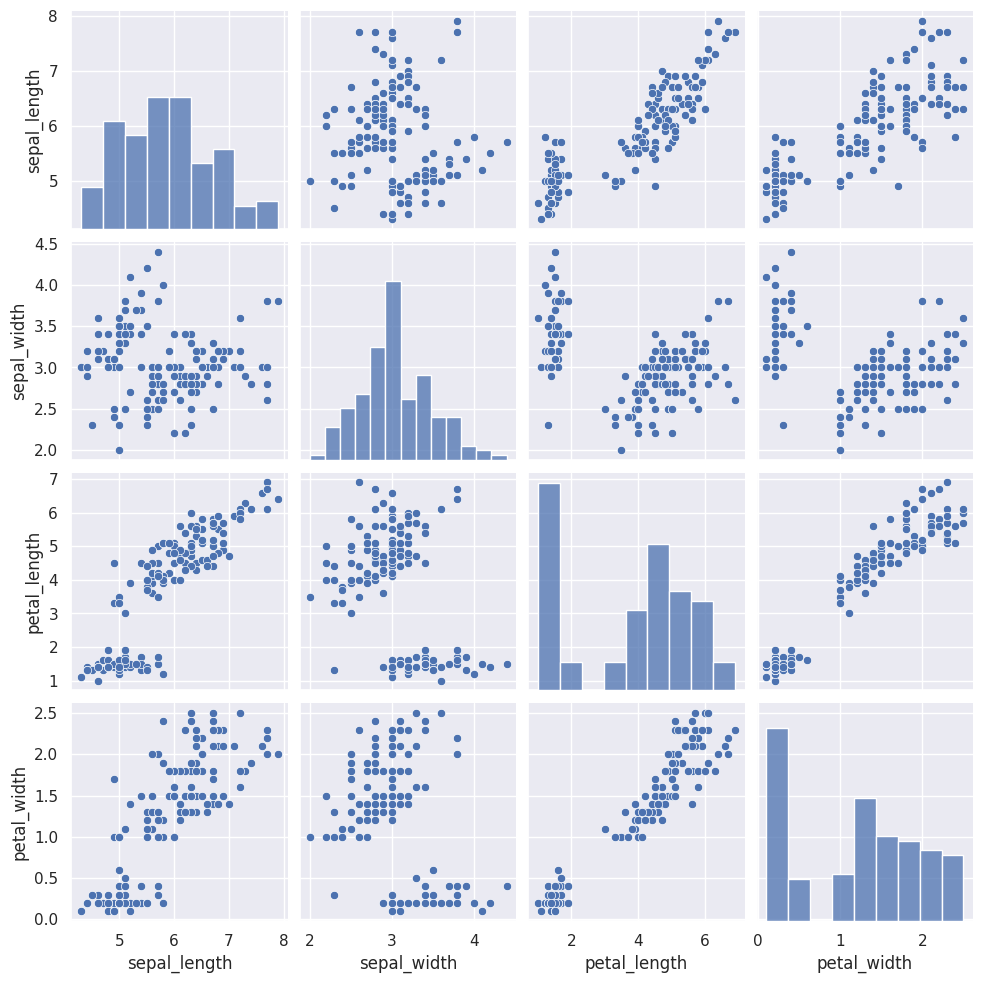

In [53]:
sns.pairplot(iris)

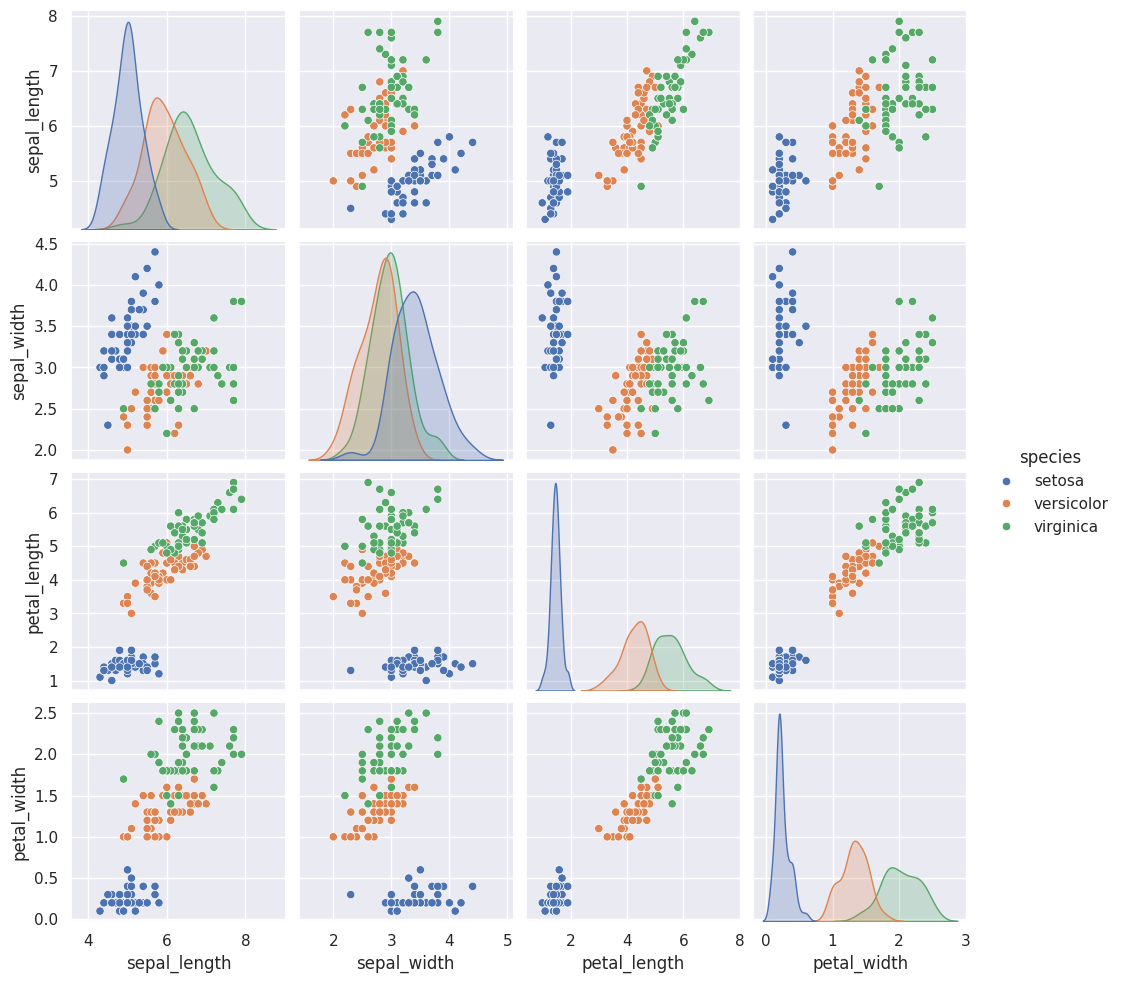

In [54]:
sns.pairplot(iris, hue="species")

## 回归图

接下来，我们继续介绍回归图，回归图的绘制函数主要有：lmplot 和 regplot。

regplot 绘制回归图时，只需要指定自变量和因变量即可，regplot 会自动完成线性回归拟合。

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

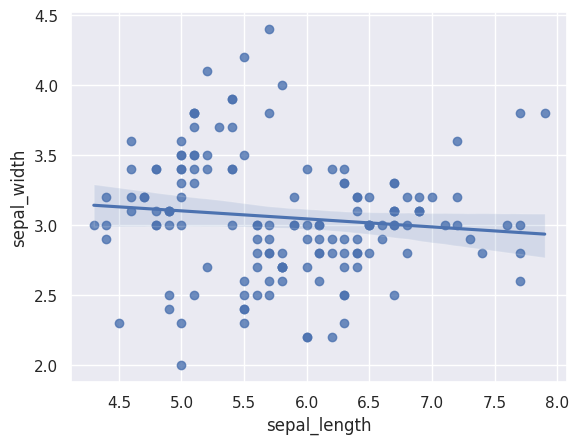

In [55]:
sns.regplot(x="sepal_length", y="sepal_width", data=iris)

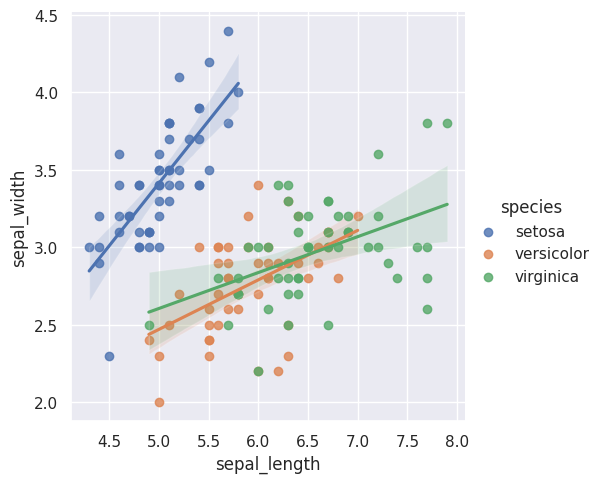

In [56]:
sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data=iris)

## 矩阵图

矩阵图中最常用的就只有 2 个，分别是：heatmap 和 clustermap。

意如其名，heatmap 主要用于绘制热力图。

<Axes: >

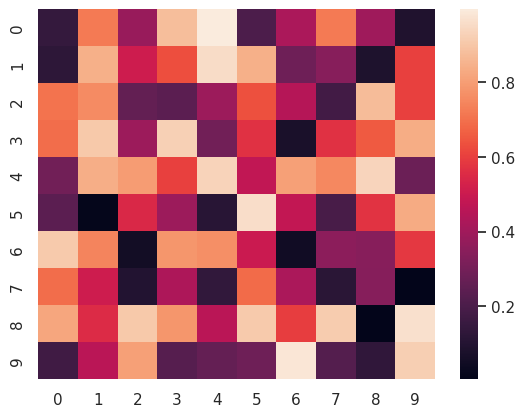

In [57]:
import numpy as np

sns.heatmap(np.random.rand(10, 10))

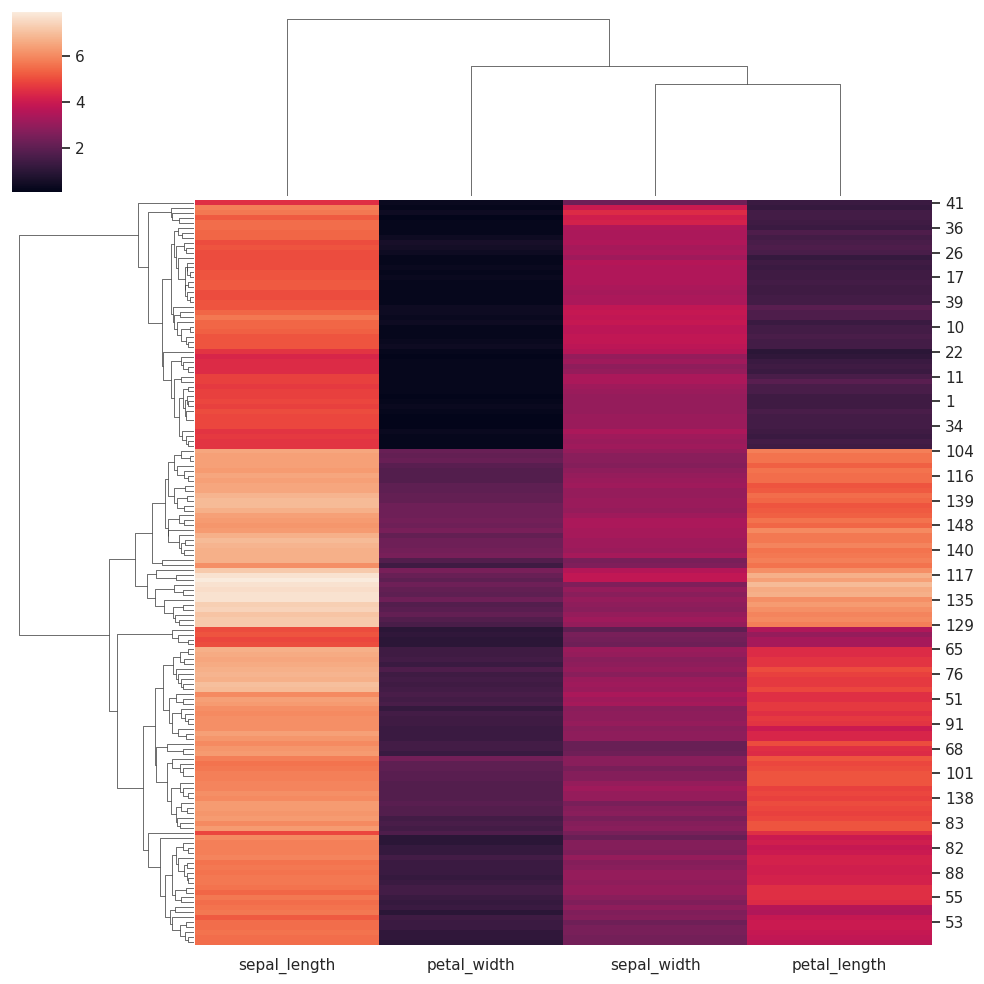

In [58]:
# clustermap 支持绘制层次聚类结构图。如下所示，我们先去掉原数据集中最后一个目标列，传入特征数据即可。
# 当然，你需要对层次聚类有所了解，否则很难看明白图像多表述的含义。
iris.pop("species")
sns.clustermap(iris)